<a href="https://colab.research.google.com/github/Ketan2010/TCS-Talent-Ocean/blob/main/TCStalentOcean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
#import libraries
import pandas as pd
#for data visualization
import matplotlib.pyplot as plt

In [130]:
!wget https://proyectos-lib.casillero.laotrared.net/data/project.csv
!wget https://proyectos-lib.casillero.laotrared.net/data/candidate.csv

--2024-07-02 21:40:55--  https://proyectos-lib.casillero.laotrared.net/data/project.csv
Resolving proyectos-lib.casillero.laotrared.net (proyectos-lib.casillero.laotrared.net)... 45.61.186.159, 2605:6400:40:fcb1:5c08:8e0c:68bb:b1dd
Connecting to proyectos-lib.casillero.laotrared.net (proyectos-lib.casillero.laotrared.net)|45.61.186.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241944 (236K) [text/csv]
Saving to: ‘project.csv.2’

project.csv.2       100%[===================>] 236.27K   284KB/s    in 0.8s    

2024-07-02 21:40:58 (284 KB/s) - ‘project.csv.2’ saved [241944/241944]

--2024-07-02 21:40:58--  https://proyectos-lib.casillero.laotrared.net/data/candidate.csv
Resolving proyectos-lib.casillero.laotrared.net (proyectos-lib.casillero.laotrared.net)... 45.61.186.159, 2605:6400:40:fcb1:5c08:8e0c:68bb:b1dd
Connecting to proyectos-lib.casillero.laotrared.net (proyectos-lib.casillero.laotrared.net)|45.61.186.159|:443... connected.
HTTP request sent, awai

In [131]:
#get dataframes of project(project id, location, required skills, description)
project = pd.read_csv('project.csv')
#get dataframe of candidate(candidate id, location, skills)
candidate = pd.read_csv('candidate.csv')

In [132]:
project.head(3)

,id,location,mode,required_skills,description
0,p3,Kolkata,DIGITAL,"Anroid, iOS Development",<p>XYZ is in process to Digital Upgrade proces...
1,p4,Kolkata,DIGITAL,"Java,Python,Groovy",<p>XYZ is in process to Digital Upgrade proces...
2,p5,Kolkata,PHYGITAL,"Python,Groovy,Java",<p>DevOps is the one of the most sought after ...


In [133]:
candidate.head(3)

,candidate_id,location,skills
0,c1,Kolkata,"C,C++,Java,Android Studio,msoffice,Python"
1,c3,Chennai,"networking,C programming,Python"
2,c7,Chennai,"Unity 3D,AR,C sharp,C,JAVA PROGRAMMING,Servlet..."


In [134]:
# extract only required data from complete dataframe of project
proj_skill = project[['id','location','required_skills']]
# rename column reuired_skills to skills
proj_skill.rename(columns = {'required_skills':'skills'}, inplace = True)
# extract only required data from complete dataframe of candidates
candi_skill = candidate[['candidate_id','location','skills']]

<ipython-input-134-67bc447110c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proj_skill.rename(columns = {'required_skills':'skills'}, inplace = True)


In [135]:
# convert dataframes data into lower case so that it will be easy to compare.
candi_skill = candi_skill.apply(lambda x: x.astype(str).str.lower())
proj_skill = proj_skill.apply(lambda x: x.astype(str).str.lower())

In [136]:
proj_skill.head()

,id,location,skills
0,p3,kolkata,"anroid, ios development"
1,p4,kolkata,"java,python,groovy"
2,p5,kolkata,"python,groovy,java"
3,p6,kolkata,"python,groovy,java"
4,p7,chennai,ui/ux designing skills


Process of data cleansing

In [137]:
# data cleaning: convert multiple possible skills into simple single skill : for candidates dataframe
candi_skill = candi_skill.replace(['java programming', 'java language', 'core java', 'programming in java', 'java se'],'java',regex=True)
candi_skill = candi_skill.replace(['c programming', 'c language', 'programming in c'],'c',regex=True)
candi_skill = candi_skill.replace(['cpp programming','cpp language'],'c++',regex=True)
candi_skill = candi_skill.replace(['android studio', 'android developement','android app developement','anroid'],'android',regex=True)
candi_skill = candi_skill.replace(['r programming', 'r language', 'programming in r'],'r',regex=True)
candi_skill = candi_skill.replace(['python programming', 'python language', 'programming in python', 'pyhon','python3'],'python',regex=True)
candi_skill = candi_skill.replace(['database','dbms', 'database system', 'database design','postgres database'],'database management system',regex=True)
candi_skill = candi_skill.replace(['basic programming skills', 'good coding skills', 'deep programming skills','good programming skills', 'programming skills','any programming skills', 'programming skills and digital skills', 'programming and digital skills'],'c,c++,java,python,r',regex=True)
candi_skill = candi_skill.replace(['web skills'],'web development',regex=True)
candi_skill = candi_skill.replace(['understanding of angular framework','angular  based hybrid mobile app'],'angular',regex=True)
candi_skill = candi_skill.replace(['cloud knowledge', 'cloud concepts'],'cloud',regex=True)
candi_skill = candi_skill.replace(['ml/dl','machine learning/dl'],'ml,deep learning',regex=True)
candi_skill = candi_skill.replace(['ms sql', 'mysql', 'structured query language'],'sql',regex=True)
candi_skill = candi_skill.replace(['c#'],'c sharp',regex=True)
candi_skill = candi_skill.replace(['java scripting knowledge'],'javascript',regex=True)


#replace & / and by ','
candi_skill = candi_skill.replace(['java/j2ee'],'java,j2ee',regex=True)
candi_skill = candi_skill.replace(['rpa with ai & machine learning'],'rpa,artificial intelligence,ml',regex=True)
candi_skill = candi_skill.replace(['mysql - good database concepts'],'sql,dbms',regex=True)
candi_skill = candi_skill.replace(['abby & python'],'abby,python',regex=True)
candi_skill = candi_skill.replace(['mongodb ml'],'mongodb,ml',regex=True)
candi_skill = candi_skill.replace(['rpa with ai & ml'],'rpa,artificial intelligence,ml',regex=True)
candi_skill = candi_skill.replace(['ios and android development'],'ios development,android',regex=True)
candi_skill = candi_skill.replace([ 'ai/ml basics', 'ai/ ml', 'ai/machine learning'],'artificial intelligence,ml',regex=True)
candi_skill = candi_skill.replace(['exposure to machine learning concepts and algorithms', 'ml development knowledge', 'ml techniques', 'machine learning','machine learning basics'],'ml',regex=True)
candi_skill = candi_skill.replace(['python/r programming', 'python/r'],'python,r',regex=True)
candi_skill = candi_skill.replace(['ml & python'],'machine learning,python',regex=True)
candi_skill = candi_skill.replace(['mongodb machine learning'],'mongodb,ml',regex=True)

In [138]:
# data cleaning: convert multiple possible skills into simple single skill : for projects dataframe
proj_skill = proj_skill.replace(['java programming', 'java language', 'core java', 'programming in java', 'java se'],'java',regex=True)
proj_skill = proj_skill.replace(['c programming', 'c language', 'programming in c'],'c',regex=True)
proj_skill = proj_skill.replace(['cpp programming','cpp language'],'c++',regex=True)
proj_skill = proj_skill.replace(['android studio', 'android developement','android app developement','anroid'],'android',regex=True)
proj_skill = proj_skill.replace(['r programming', 'r language', 'programming in r'],'r',regex=True)
proj_skill = proj_skill.replace(['python programming', 'python language', 'programming in python', 'pyhon','python3'],'python',regex=True)
proj_skill = proj_skill.replace(['database','dbms', 'database system', 'database design','postgres database'],'database management system',regex=True)
proj_skill = proj_skill.replace(['basic programming skills', 'good coding skills', 'deep programming skills','good programming skills', 'programming skills','any programming skills', 'programming skills and digital skills', 'programming and digital skills'],'c,c++,java,python,r',regex=True)
proj_skill = proj_skill.replace(['web skills'],'web development',regex=True)
proj_skill = proj_skill.replace(['understanding of angular framework','angular  based hybrid mobile app'],'angular',regex=True)
proj_skill = proj_skill.replace(['cloud knowledge', 'cloud concepts'],'cloud',regex=True)
proj_skill = proj_skill.replace(['ml/dl','machine learning/dl'],'ml,deep learning',regex=True)
proj_skill = proj_skill.replace(['ms sql', 'mysql', 'structured query language'],'sql',regex=True)
proj_skill = proj_skill.replace(['c#'],'c sharp',regex=True)
proj_skill = proj_skill.replace(['java scripting knowledge'],'javascript',regex=True)


#replace & / and by ','
proj_skill = proj_skill.replace(['java/j2ee'],'java,j2ee',regex=True)
proj_skill = proj_skill.replace(['rpa with ai & machine learning'],'rpa,artificial intelligence,ml',regex=True)
proj_skill = proj_skill.replace(['mysql - good database concepts'],'sql,dbms',regex=True)
proj_skill = proj_skill.replace(['abby & python'],'abby,python',regex=True)
proj_skill = proj_skill.replace(['mongodb ml'],'mongodb,ml',regex=True)
proj_skill = proj_skill.replace(['rpa with ai & ml'],'rpa,artificial intelligence,ml',regex=True)
proj_skill = proj_skill.replace(['ios and android development'],'ios development,android',regex=True)
proj_skill = proj_skill.replace([ 'ai/ml basics', 'ai/ ml', 'ai/machine learning'],'artificial intelligence,ml',regex=True)
proj_skill = proj_skill.replace(['exposure to machine learning concepts and algorithms', 'ml development knowledge', 'ml techniques', 'machine learning','machine learning basics'],'ml',regex=True)
proj_skill = proj_skill.replace(['python/r programming', 'python/r'],'python,r',regex=True)
proj_skill = proj_skill.replace(['ml & python'],'machine learning,python',regex=True)
proj_skill = proj_skill.replace(['mongodb machine learning'],'mongodb,ml',regex=True)

In [139]:
# convert comma seperated skills into list
candi_skill.skills = candi_skill.skills.str.split(',')
proj_skill.skills = proj_skill.skills.str.split(',')

In [140]:
# print final dataframe of candidate which contains candidate id, skills and location
candi_skill.head(3)

,candidate_id,location,skills
0,c1,kolkata,"[c, c++, java, android, msoffice, python]"
1,c3,chennai,"[networking, c, python]"
2,c7,chennai,"[unity 3d, ar, c sharp, c, java, servlet and j..."


In [141]:
# print final dataframe of projects which contains project id, location and required skills
proj_skill.head()

,id,location,skills
0,p3,kolkata,"[android, ios development]"
1,p4,kolkata,"[java, python, groovy]"
2,p5,kolkata,"[python, groovy, java]"
3,p6,kolkata,"[python, groovy, java]"
4,p7,chennai,[ui/ux designing skills]


In [142]:
res = set(['postgresql', 'html and css'])&set(['postgresql'])
res

{'postgresql'}

final comparison between reuired skills and candidate skills<br>
Caculating matching factor

In [143]:
#initialize empty lists which will be further need to design final dataframe
#and to store suitable candidates and their matching percentage respectively
candidates_list = []
percentage_list = []
#iterate through project id
for i in proj_skill.index:
  #total number of required skills
  total_req_skill = len(proj_skill['skills'][i])
  n =[]
  #iterate through candidates id for every project id
  for j in candi_skill.index:
    #get number of matching skills of candidate with requied skills
    matched_skills = len(set(proj_skill['skills'][i]) & set(candi_skill['skills'][j]))
    #give 90% weightage to matching skills
    #calculate 90% of matching factor
    factor = (matched_skills/total_req_skill)*90
    #give 10% weightage to matching locations
    if(proj_skill['location'][i] == candi_skill['location'][j]):
      #add 10% if candidate having same location as that of project
      factor = factor + 10
    #add total factor after 2 digit rounding
    n.append(round(factor,2))
  #create dataframe to store matching factor
  #convert list of matching factors into datframe df
  df = pd.DataFrame(n,columns =['matched_factor'])
  #merger dataframe of candidtae skills and calculated matching factors
  df = pd.merge(candi_skill, df, left_index=True, right_index=True)
  #sort result in descending order of matching factor
  df = df.sort_values('matched_factor',ascending=False)
  #get only top 5 candidates with highest matching factor
  df = df.head(5)
  #get resultant into list
  x = df['candidate_id'].tolist()
  y = df['matched_factor'].tolist()
  #append ith project top 5 suitable candidates and their matching factor in list
  candidates_list.append(x) # candidate_list contains top 5 candidates with higher percentage for every project
  percentage_list.append(y) # percentage_list contains top 5 candidates matching percentage for every project


In [144]:
candidates_list[:3]

[['c1', 'c345', 'c500', 'c57', 'c494'],
 ['c1', 'c60', 'c701', 'c500', 'c469'],
 ['c1', 'c60', 'c701', 'c500', 'c469']]

In [145]:
percentage_list[:3]

[[55.0, 55.0, 55.0, 55.0, 55.0],
 [70.0, 70.0, 70.0, 70.0, 70.0],
 [70.0, 70.0, 70.0, 70.0, 70.0]]

In [146]:
#create new temporal dataframe from existing dataframe of project skills
x = proj_skill[['id']]
#add two columns in it with default value any
x.insert(1, "suitable_candidates", "Any")
x.insert(2, "matched_percentage", "Any")

In [147]:
x.head()

,id,suitable_candidates,matched_percentage
0,p3,Any,Any
1,p4,Any,Any
2,p5,Any,Any
3,p6,Any,Any
4,p7,Any,Any


In [148]:
#iterate through temprory dataframe
for i in x.index:
  #store suitable candidates from list
  x['suitable_candidates'][i] = candidates_list[i]
  #store thier matching factors from list
  x['matched_percentage'][i] = percentage_list[i]

print(x)

       id             suitable_candidates              matched_percentage
0      p3     [c1, c345, c500, c57, c494]  [55.0, 55.0, 55.0, 55.0, 55.0]
1      p4     [c1, c60, c701, c500, c469]  [70.0, 70.0, 70.0, 70.0, 70.0]
2      p5     [c1, c60, c701, c500, c469]  [70.0, 70.0, 70.0, 70.0, 70.0]
3      p6     [c1, c60, c701, c500, c469]  [70.0, 70.0, 70.0, 70.0, 70.0]
4      p7  [c735, c598, c128, c650, c605]  [10.0, 10.0, 10.0, 10.0, 10.0]
..    ...                             ...                             ...
437  p853    [c1, c477, c183, c189, c216]  [72.0, 72.0, 72.0, 72.0, 72.0]
438  p854    [c1, c477, c183, c189, c216]  [72.0, 72.0, 72.0, 72.0, 72.0]
439  p855    [c102, c65, c813, c15, c612]  [10.0, 10.0, 10.0, 10.0, 10.0]
440  p856    [c441, c1, c477, c183, c189]  [82.0, 72.0, 72.0, 72.0, 72.0]
441  p857    [c1, c299, c531, c530, c527]  [90.0, 90.0, 90.0, 90.0, 90.0]

[442 rows x 3 columns]


<ipython-input-148-2c41ae3f30dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['suitable_candidates'][i] = candidates_list[i]
<ipython-input-148-2c41ae3f30dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['matched_percentage'][i] = percentage_list[i]
<ipython-input-148-2c41ae3f30dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['suitable_candidates'][i] = candidates_list[i]
<ipython-input-148-2c41ae3f30dc>:6: SettingWith

In [149]:
x.head()

,id,suitable_candidates,matched_percentage
0,p3,"[c1, c345, c500, c57, c494]","[55.0, 55.0, 55.0, 55.0, 55.0]"
1,p4,"[c1, c60, c701, c500, c469]","[70.0, 70.0, 70.0, 70.0, 70.0]"
2,p5,"[c1, c60, c701, c500, c469]","[70.0, 70.0, 70.0, 70.0, 70.0]"
3,p6,"[c1, c60, c701, c500, c469]","[70.0, 70.0, 70.0, 70.0, 70.0]"
4,p7,"[c735, c598, c128, c650, c605]","[10.0, 10.0, 10.0, 10.0, 10.0]"


In [150]:
#merge project skills and temporary dataframe to get final result
final_df = pd.merge(proj_skill, x, left_index=True, right_index=True)

In [151]:
final_df.head()

,id_x,location,skills,id_y,suitable_candidates,matched_percentage
0,p3,kolkata,"[android, ios development]",p3,"[c1, c345, c500, c57, c494]","[55.0, 55.0, 55.0, 55.0, 55.0]"
1,p4,kolkata,"[java, python, groovy]",p4,"[c1, c60, c701, c500, c469]","[70.0, 70.0, 70.0, 70.0, 70.0]"
2,p5,kolkata,"[python, groovy, java]",p5,"[c1, c60, c701, c500, c469]","[70.0, 70.0, 70.0, 70.0, 70.0]"
3,p6,kolkata,"[python, groovy, java]",p6,"[c1, c60, c701, c500, c469]","[70.0, 70.0, 70.0, 70.0, 70.0]"
4,p7,chennai,[ui/ux designing skills],p7,"[c735, c598, c128, c650, c605]","[10.0, 10.0, 10.0, 10.0, 10.0]"


In [152]:
#delete unneccesary / repeated column from dataframe
del final_df['id_y']

In [153]:
final_df.head()

,id_x,location,skills,suitable_candidates,matched_percentage
0,p3,kolkata,"[android, ios development]","[c1, c345, c500, c57, c494]","[55.0, 55.0, 55.0, 55.0, 55.0]"
1,p4,kolkata,"[java, python, groovy]","[c1, c60, c701, c500, c469]","[70.0, 70.0, 70.0, 70.0, 70.0]"
2,p5,kolkata,"[python, groovy, java]","[c1, c60, c701, c500, c469]","[70.0, 70.0, 70.0, 70.0, 70.0]"
3,p6,kolkata,"[python, groovy, java]","[c1, c60, c701, c500, c469]","[70.0, 70.0, 70.0, 70.0, 70.0]"
4,p7,chennai,[ui/ux designing skills],"[c735, c598, c128, c650, c605]","[10.0, 10.0, 10.0, 10.0, 10.0]"


In [154]:
!wget "https://proyectos-lib.casillero.laotrared.net/data/sol_format.csv"

--2024-07-02 21:41:03--  https://proyectos-lib.casillero.laotrared.net/data/sol_format.csv
Resolving proyectos-lib.casillero.laotrared.net (proyectos-lib.casillero.laotrared.net)... 45.61.186.159, 2605:6400:40:fcb1:5c08:8e0c:68bb:b1dd
Connecting to proyectos-lib.casillero.laotrared.net (proyectos-lib.casillero.laotrared.net)|45.61.186.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 792 [text/csv]
Saving to: ‘sol_format.csv.1’

sol_format.csv.1    100%[===================>]     792  --.-KB/s    in 0s      

2024-07-02 21:41:04 (408 MB/s) - ‘sol_format.csv.1’ saved [792/792]



In [155]:
#get dataframe file of solution
#which contains projects id for which we need to find suitable condidates
sol_form = pd.read_csv('sol_format.csv')

In [156]:
sol_form.head(5)

,id
0,p10
1,p100
2,p107
3,p115
4,p121


In [157]:
#add columns(location, skills, suitable_candidates and matched_percentage) in dataframe of solution
sol_form.insert(1, "location", "Any")
sol_form.insert(2, "skills", "Any")
sol_form.insert(3, "suitable_candidates", "Any")
sol_form.insert(4, "matched_percentage", "Any")

In [158]:
#iterate through solution
for i in sol_form.index:
  #iterate thrugh final dataframe
  for j in final_df.index:
    #check for project id matching
    if(sol_form['id'][i]==final_df['id_x'][j]):
      #copy data from final dataframe to solution dataframe
      sol_form['location'][i] = final_df['location'][j]
      sol_form['skills'][i] = final_df['skills'][j]
      sol_form['suitable_candidates'][i] = final_df['suitable_candidates'][j]
      sol_form['matched_percentage'][i] = final_df['matched_percentage'][j]

In [159]:
sol_form.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   135 non-null    object
 1   location             135 non-null    object
 2   skills               135 non-null    object
 3   suitable_candidates  135 non-null    object
 4   matched_percentage   135 non-null    object
dtypes: object(5)
memory usage: 5.4+ KB


In [160]:
sol_form.head()

,id,location,skills,suitable_candidates,matched_percentage
0,p10,chennai,"[android, java, mongodb ml]","[c567, c502, c1, c345, c120]","[70.0, 70.0, 60.0, 60.0, 60.0]"
1,p100,chennai,"[spring boot, sql, java, j2ee]","[c567, c549, c183, c393, c109]","[77.5, 67.5, 55.0, 55.0, 55.0]"
2,p107,delhi,"[java, python, xamarin, vuforia, arcore, ios ...","[c1, c472, c345, c375, c567]","[38.57, 38.57, 38.57, 38.57, 38.57]"
3,p115,mumbai,[python],"[c813, c15, c145, c788, c612]","[100.0, 100.0, 100.0, 100.0, 100.0]"
4,p121,delhi,"[c, c++, java, python, r]","[c441, c1, c477, c183, c189]","[100.0, 72.0, 72.0, 72.0, 72.0]"


# DATA VISUALIZATION

In [161]:
# graph to show project against matching factor
factor_list=[]
proj_id_list=[]
for i in sol_form.index:
  f=[]
  f = sol_form['matched_percentage'][i]
  factor_list.append(f[0])
  proj_id_list.append(sol_form['id'][i])

<BarContainer object of 135 artists>

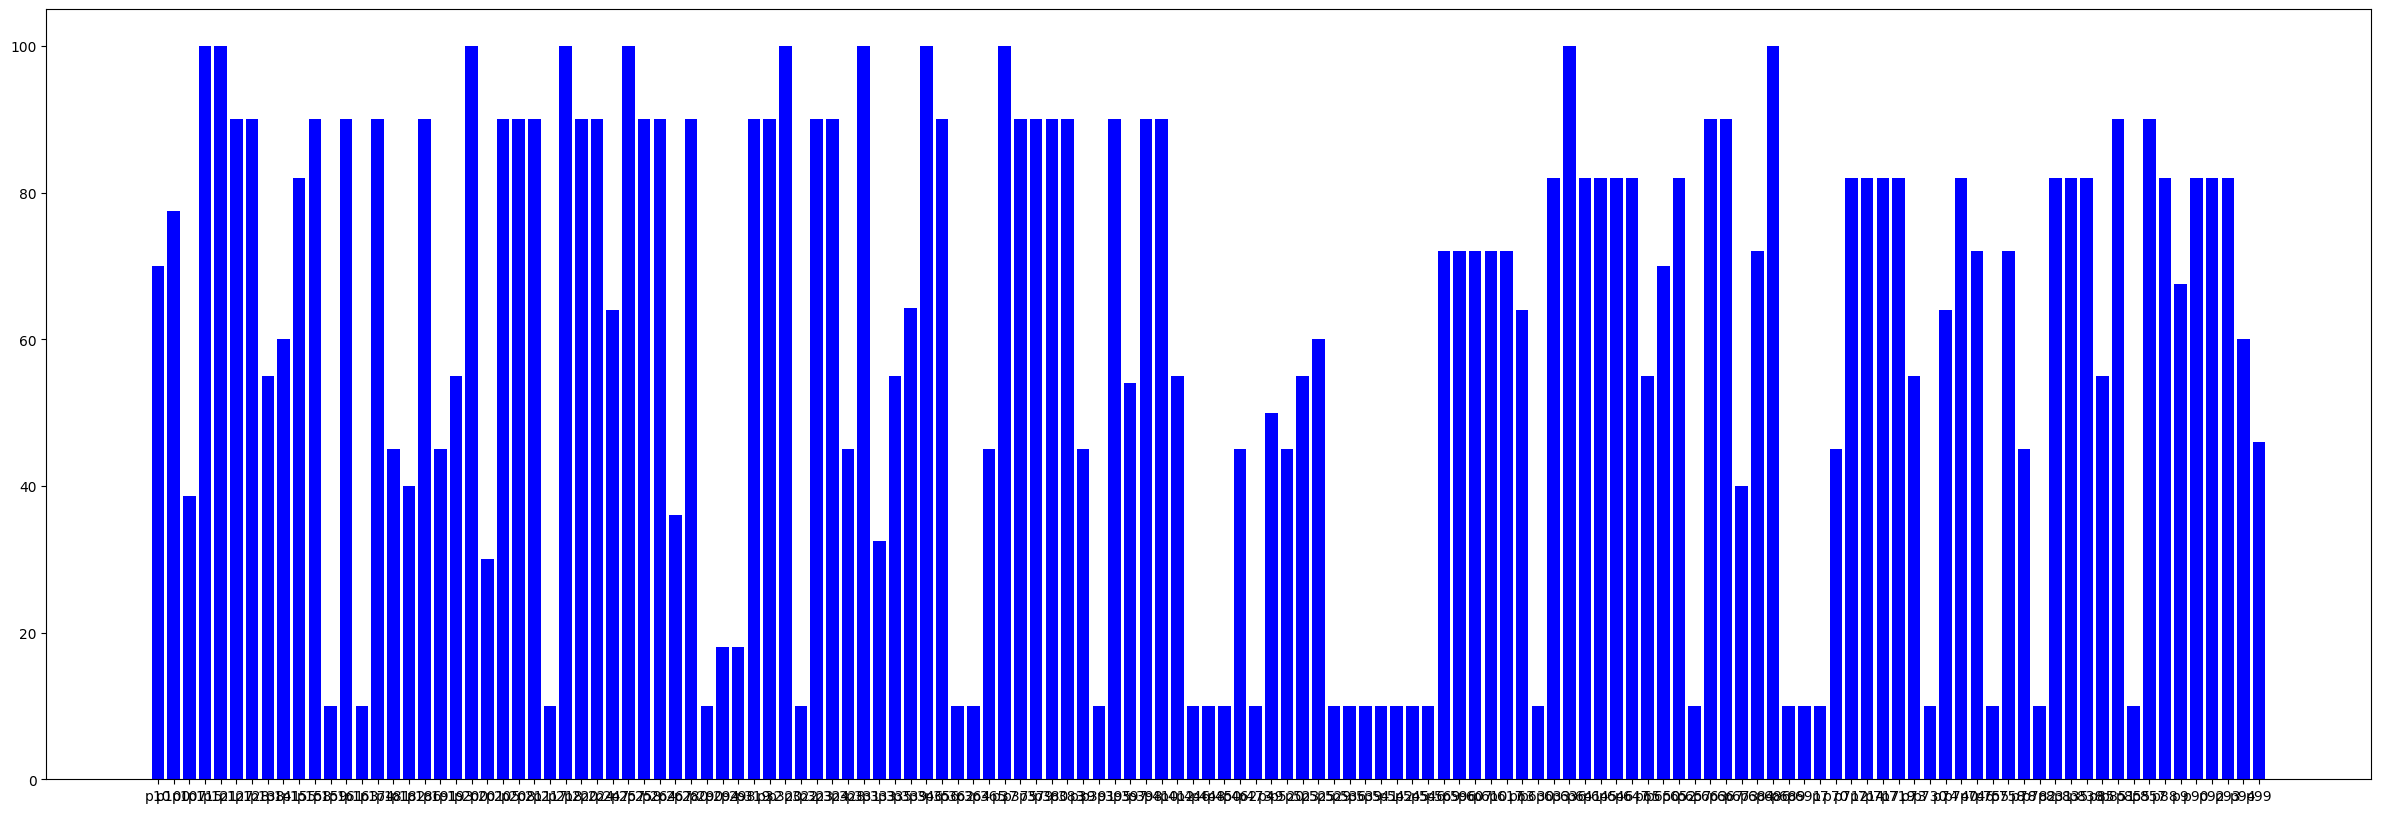

In [162]:
plt.figure(figsize=(30,10))
plt.bar(proj_id_list, factor_list, color="blue")

In [163]:
first_projects = sol_form.iloc[:15]
first_projects

,id,location,skills,suitable_candidates,matched_percentage
0,p10,chennai,"[android, java, mongodb ml]","[c567, c502, c1, c345, c120]","[70.0, 70.0, 60.0, 60.0, 60.0]"
1,p100,chennai,"[spring boot, sql, java, j2ee]","[c567, c549, c183, c393, c109]","[77.5, 67.5, 55.0, 55.0, 55.0]"
2,p107,delhi,"[java, python, xamarin, vuforia, arcore, ios ...","[c1, c472, c345, c375, c567]","[38.57, 38.57, 38.57, 38.57, 38.57]"
3,p115,mumbai,[python],"[c813, c15, c145, c788, c612]","[100.0, 100.0, 100.0, 100.0, 100.0]"
4,p121,delhi,"[c, c++, java, python, r]","[c441, c1, c477, c183, c189]","[100.0, 72.0, 72.0, 72.0, 72.0]"
5,p127,noida,"[c, c++, java, python, r]","[c441, c1, c477, c183, c189]","[90.0, 72.0, 72.0, 72.0, 72.0]"
6,p128,noida,"[c, c++, java, python, r]","[c441, c1, c477, c183, c189]","[90.0, 72.0, 72.0, 72.0, 72.0]"
7,p138,hyderabad,"[java, database management system exposure]","[c816, c472, c535, c337, c110]","[55.0, 55.0, 55.0, 55.0, 55.0]"
8,p141,hyderabad,"[react.js, javascript, html 5 and css3]","[c549, c101, c429, c164, c795]","[60.0, 40.0, 40.0, 40.0, 40.0]"
9,p155,hyderabad,"[c, c++, java, python, r ]","[c646, c640, c530, c420, c429]","[82.0, 82.0, 82.0, 82.0, 82.0]"


In [164]:
# graph to show project against matching factor
first_proj_factor_list=[]
first_proj_id_list=[]
for i in first_projects.index:
  f=[]
  f = first_projects['matched_percentage'][i]
  first_proj_factor_list.append(f[0])
  first_proj_id_list.append(sol_form['id'][i])

<BarContainer object of 15 artists>

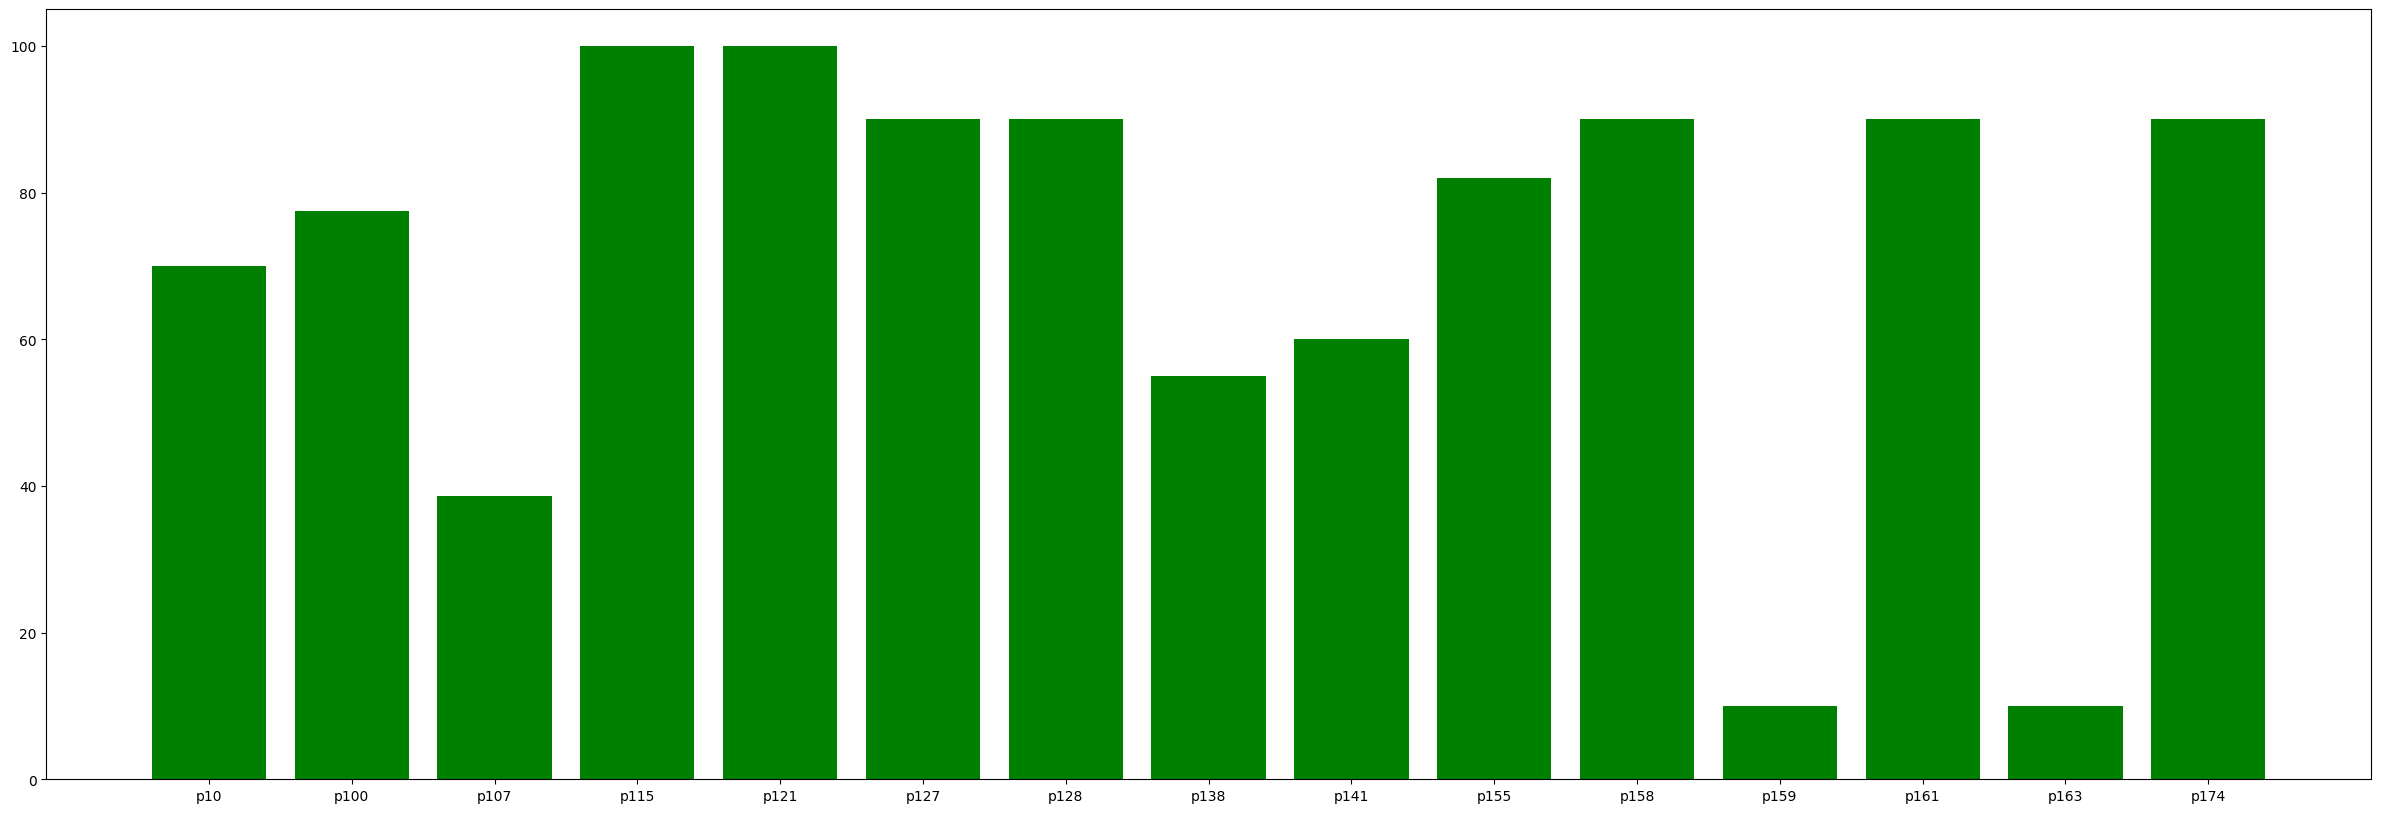

In [165]:
plt.figure(figsize=(30,10))
plt.bar(first_proj_id_list, first_proj_factor_list, color="green")

In [166]:
# Calculation of required data for Pie chart to show matching factors for projects
zero_to_twenty=0
twenty_to_fourty=0
fourty_to_sixty=0
sixty_to_eighty=0
eighty_to_hundred=0
for i in factor_list:
  if(0<=i and i<=20):
    zero_to_twenty += 1
  elif(21<=i and i<=40):
    twenty_to_fourty += 1
  elif(41<=i and i<=60):
    fourty_to_sixty += 1
  elif(61<=i and i<=90):
    sixty_to_eighty += 1
  elif(81<=i and i<=100):
    eighty_to_hundred += 1

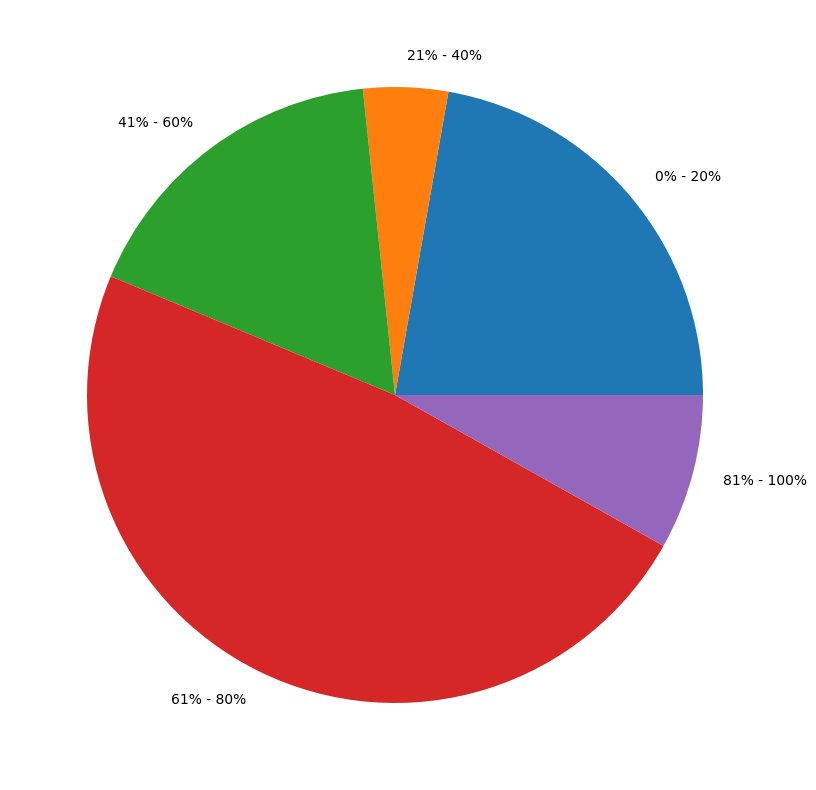

In [167]:
import numpy as np
y = np.array([zero_to_twenty, twenty_to_fourty, fourty_to_sixty, sixty_to_eighty, eighty_to_hundred])
mylabels = ["0% - 20%", "21% - 40%", "41% - 60%", "61% - 80%", "81% - 100%"]
plt.figure(figsize=(30,10))
plt.pie(y, labels = mylabels)
plt.show()

## Resources

**TCS TALENT OCEAN** <br>
Name: Ketan Shantaram Patil <br>
CT Number: CT20203174022 <br>
Gmail: k2p1020@gmail.com <br>
Contact Number: 7744895120 <br>
College Name: Vidyalankar Institute of Technology, Mumbai <br>
Current Education: Bachelor of engineering Information
Technology (T.E)